# Génération de Données pour la Détection de Drift

Ce notebook génère deux ensembles de données synthétiques pour simuler un scénario de drift dans un modèle de prédiction de churn client.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
n_samples = 2000

# Phase A : données historiques
monthly_spend_A = np.random.normal(loc=50, scale=10, size=n_samples)
usage_hours_A = np.random.normal(loc=40, scale=8, size=n_samples)
tenure_A = np.random.exponential(scale=24, size=n_samples)
support_score_A = np.random.uniform(0.4, 1.0, size=n_samples)

## Phase A : Génération des données historiques

Nous générons 2000 échantillons avec les caractéristiques suivantes :
- **monthly_spend** : dépenses mensuelles (moyenne=50€, écart-type=10€)
- **usage_hours** : heures d'utilisation par mois (moyenne=40h, écart-type=8h)
- **tenure** : ancienneté du client en mois (distribution exponentielle, moyenne=24 mois)
- **support_score** : score de satisfaction du support (entre 0.4 et 1.0)

In [18]:
logits_A = (
    0.06 * monthly_spend_A
    - 0.04 * usage_hours_A
    - 0.03 * tenure_A
    - 2.0 * support_score_A
)

proba_churn_A = 1 / (1 + np.exp(-logits_A))
churn_A = np.random.binomial(1, proba_churn_A)


### Calcul de la probabilité de churn (Phase A)

Nous utilisons une régression logistique avec les coefficients suivants :
- Dépenses mensuelles augmentent le risque de churn (+0.06)
- Heures d'utilisation réduisent le risque (-0.04)
- Ancienneté réduit le risque (-0.03)
- Score de support réduit fortement le risque (-2.0)

In [19]:
data_A = pd.DataFrame({
    "monthly_spend": monthly_spend_A,
    "usage_hours": usage_hours_A,
    "tenure": tenure_A,
    "support_score": support_score_A,
    "churn": churn_A
})

data_A.head()


,monthly_spend,usage_hours,tenure,support_score,churn
0,54.967142,34.598574,15.926959,0.773903,0
1,48.617357,38.843851,2.142523,0.444657,1
2,56.476885,33.660641,86.211990,0.702215,0
3,65.230299,37.536308,17.515987,0.509575,0
4,47.658466,24.851083,22.857613,0.744385,1


### Création du DataFrame Phase A

Construction du jeu de données d'entraînement avec toutes les variables.

In [20]:
# Phase B : données de production avec drift
monthly_spend_B = np.random.normal(loc=60, scale=10, size=n_samples)  # hausse prix
usage_hours_B = np.random.normal(loc=37, scale=8, size=n_samples)    # légère baisse
tenure_B = np.random.exponential(scale=24, size=n_samples)           # stable
support_score_B = np.random.uniform(0.2, 0.8, size=n_samples)        # support dégradé


## Phase B : Génération des données avec drift

Simulation d'un changement dans la distribution des données :
- **monthly_spend** : hausse à 60€ (inflation ou augmentation de prix)
- **usage_hours** : légère baisse à 37h (changement de comportement)
- **tenure** : reste stable
- **support_score** : dégradation du support (entre 0.2 et 0.8)

In [21]:
logits_B = (
    0.06 * monthly_spend_B
    - 0.04 * usage_hours_B
    - 0.03 * tenure_B
    - 2.0 * support_score_B
)

proba_churn_B = 1 / (1 + np.exp(-logits_B))
churn_B = np.random.binomial(1, proba_churn_B)


### Calcul de la probabilité de churn (Phase B)

Utilisation du même modèle logistique que la Phase A pour calculer le churn.

In [22]:
data_B = pd.DataFrame({
    "monthly_spend": monthly_spend_B,
    "usage_hours": usage_hours_B,
    "tenure": tenure_B,
    "support_score": support_score_B,
    "churn": churn_B
})

data_B.head()


,monthly_spend,usage_hours,tenure,support_score,churn
0,55.487812,24.437393,20.018016,0.459539,1
1,58.691994,39.693698,8.475098,0.299859,1
2,62.928288,32.854928,21.078893,0.391355,1
3,41.195645,32.694103,13.900320,0.459300,0
4,44.306104,29.124696,8.635437,0.628335,0


### Création du DataFrame Phase B

Construction du jeu de données de production avec drift.

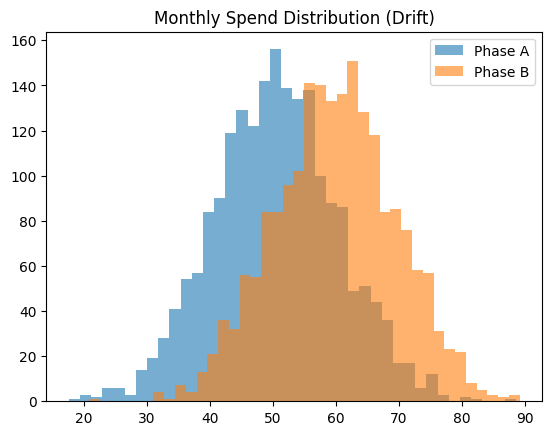

In [23]:
plt.hist(monthly_spend_A, bins=40, alpha=0.6, label="Phase A")
plt.hist(monthly_spend_B, bins=40, alpha=0.6, label="Phase B")
plt.legend()
plt.title("Monthly Spend Distribution (Drift)")
plt.show()


## Visualisation du drift

Comparaison des distributions de `monthly_spend` entre les deux phases pour observer le drift.

In [24]:
# Sauvegarder les datasets
data_A.to_csv("data/phase_A_historical.csv", index=False)
data_B.to_csv("data/phase_B_production.csv", index=False)

print("✓ Datasets sauvegardés dans le dossier 'data/'")
print(f"  - Phase A: {len(data_A)} échantillons")
print(f"  - Phase B: {len(data_B)} échantillons")

✓ Datasets sauvegardés dans le dossier 'data/'
  - Phase A: 2000 échantillons
  - Phase B: 2000 échantillons


## Sauvegarde des datasets

Exportation des données vers le dossier `data/` au format CSV.